# Loading Portfolio Data

This notebook explains how you can load the raw stock price data and calculate the daily value of the overall portfolio and the daily position of any stock and the portfolio cash balance.

In [1]:
%load_ext autoreload
%autoreload 2

# !pip install nb_black
%load_ext nb_black

&lt;IPython.core.display.Javascript object&gt;

In [2]:
import sys
sys.path.append("..")

&lt;IPython.core.display.Javascript object&gt;

In [3]:
import pandas as pd
import ffn

%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

from ppt.portfolio_value import Portfolio

&lt;IPython.core.display.Javascript object&gt;

## Load Data

Loading the stock data and calculating the daily value is all wrapped within the `Portfolio` object and is calculated upon initialisation.

> See `loading_raw_data.ipynb` for how the loading of the data is done behind the scenes

Initialising the `Portfolio` object assumes that the input csv is located at
`../data/raw/purchase_info.csv`. H
owever, you can specify your own location using the optional `input_data_source` argument.

In [4]:
#initiate Portfolio object
pf = Portfolio()

&lt;IPython.core.display.Javascript object&gt;

In [6]:
def print_properties(object):
    for attr in dir(object):
        if attr[0] != '_':
            print(attr)

# properties availble to portfolio object
print_properties(pf)

cash
daily_stock_prices_local_currency
daily_stock_prices_usd
datetime_index
input_data_source
portfolio_value_usd
positions
start_date
stock_metadata
stocks
tickers


&lt;IPython.core.display.Javascript object&gt;

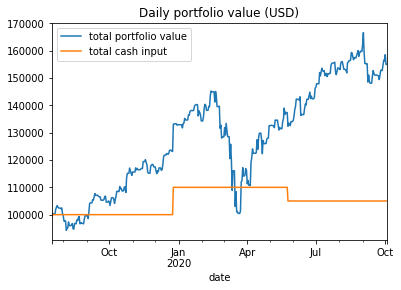

&lt;IPython.core.display.Javascript object&gt;

In [8]:
pf.portfolio_value_usd.plot(label='total portfolio value')
pf.cash.cash_flows['external_cashflows'].plot(label='total cash input')
plt.title("Daily portfolio value (USD)")
plt.legend()
plt.show()

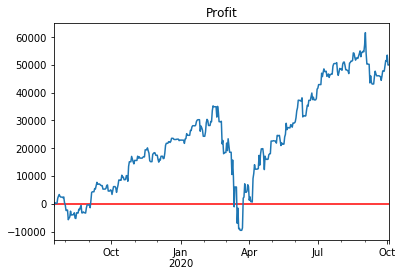

&lt;IPython.core.display.Javascript object&gt;

In [12]:
profit = pf.portfolio_value_usd - pf.cash.cash_flows['external_cashflows']
plt.title("Profit")
profit.plot()
plt.hlines(y=0,xmax=pf.datetime_index[-1],xmin=pf.datetime_index[0],color='r')
plt.show()

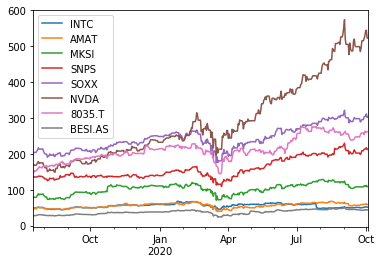

&lt;IPython.core.display.Javascript object&gt;

In [14]:
#plot individual stock prices
pf.daily_stock_prices_usd.plot()
plt.show()

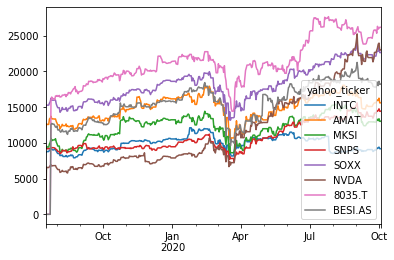

&lt;IPython.core.display.Javascript object&gt;

In [16]:
#plot individual value of each position
pf.stocks.daily_stocks_value_usd.plot()
plt.show()